[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/PO_II/blob/main/2_Grafos_intro/2_Buscas.ipynb)


## **Pesquisa Operacional II**

**Prof. Diogo Ferreira de Lima Silva (TEP-UFF)**


# Teoria dos grafos

# Importando bibliotecas

Vamos iniciar importando algumas bibliotecas que serão usadas na aula de hoje.

- **matplotlib**: principal biblioteca para visualizações python;
- **networkx**: biblioteca para grafos/redes em python
- **pandas**: biblioteca para dataframes em python

In [1]:
from IPython import display

## Buscas em grafos

### Criando uma grafo

Vamos iniciar criando uma lista de adjacências


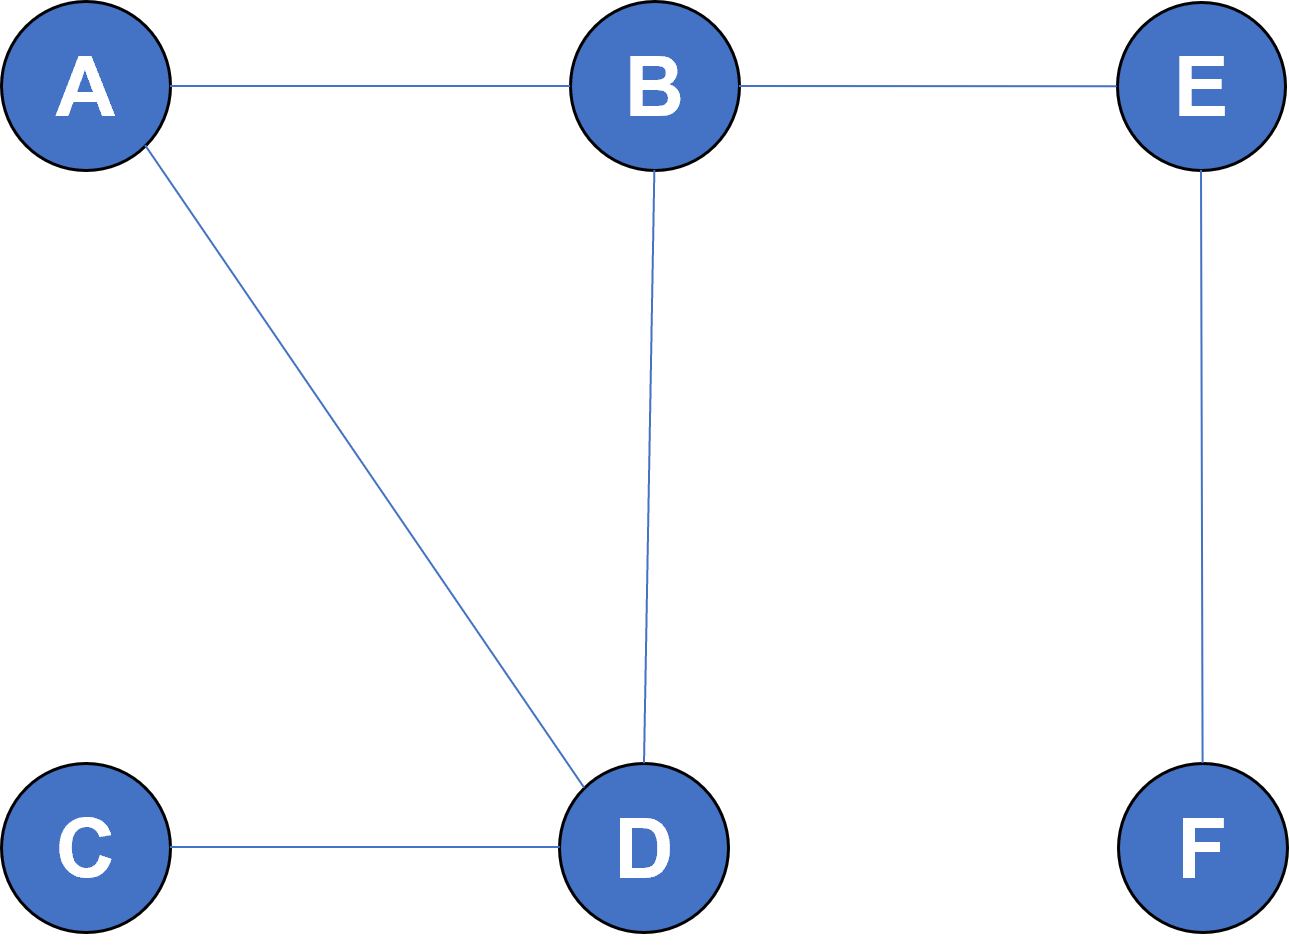

In [2]:
display.Image("Grafo_aula_buscas.png", width = "600")

In [3]:
G = {'A': set(['B', 'D']),
    'B': set(['A', 'D', 'E']),
    'C': set(['D']),
    'D': set(['A','B', 'C']),
    'E': set(['B', 'F']),
    'F': set(['E'])}

### Busca em profundidade

Abaixo vamos criar uma função para realizar a busca em profundidade. 

As relações de parentesco serão guardadas em um dicionário, inicializado como um dicionário vazio.

Lembrem que a busca em profundidade é **recursiva**!

In [4]:
def busca_profundidade (g, v, visitado = None, pai_dict = {}):
    '''
    Inputs:
        g: Dict - lista de adjacências de um grafo passada como um dicionário 
        v: string - vértice inicial da busca
        visitado: set - conjunto de vértices já visitados
        pai: Dict - dicionário vazio
    '''
    # Se nada foi passado, inicialize o conjunto de visitados como um conjunto vazio
    if visitado is None:
        visitado = set()
    
    # Se o dicionário dos pais estiver vazio, primeiro caso, inicialize com o vértice inicial
    if pai_dict == {}: 
        pai_dict[v] = v + " foi escolhido como vértice inicial - não tem pai"
    
    # Adicione o vértice inicial ao conjunto
    visitado.add(v)
    
    for v_ in g[v] - visitado:
        pai_dict[v_] = v
        busca_profundidade(g, v_, visitado, pai_dict)
    
    return visitado, pai_dict

In [5]:
busca_profundidade(G, 'A')

({'A', 'B', 'C', 'D', 'E', 'F'},
 {'A': 'A foi escolhido como vértice inicial - não tem pai',
  'B': 'A',
  'D': 'A',
  'C': 'D',
  'E': 'B',
  'F': 'E'})

### Busca em largura

Agora, criaremos uma função para realizar uma busca em largura. 

Nesse caso, precisamos criar uma fila. O metodo deque é bastante útil nesse caso

In [6]:
from collections import deque

def busca_largura(g, v):
    
    visitado = set() # inicialmente, ninguém foi visitado. 
    
    #Criando uma fila apenas com o vértice inicial
    fila = deque([v])

    # criando um dicionário de parentesco
    pai_dict = {v: v + " foi escolhido como vértice inicial - não tem pai"}

    # Enquanto a fila não estiver vazia
    while fila:
        v_ = fila.popleft() # Tire da fila o mais a esquerda
        visitado.add(v_) # Adicione esse vértice ao conjunto de visitados
        
        # Para cada vértice vizinho e ainda não foi visitado
        for vizinho in g[v_]:          
            if vizinho not in visitado:
                fila.append(vizinho) # Coloque o vizinho no fim da fila
                pai_dict[vizinho] = v_ # Esse vizinho adicionado à fila é filho de v_
    
    return visitado, pai_dict

In [7]:
busca_largura(G, 'A')

({'A', 'B', 'C', 'D', 'E', 'F'},
 {'A': 'A foi escolhido como vértice inicial - não tem pai',
  'B': 'A',
  'D': 'B',
  'E': 'B',
  'C': 'D',
  'F': 'E'})

# Usando o networkx

A biblioteca networkx possui funções específicas para as buscas em profundidade e em largura.

Vamos ler o grafo criado no início do notebook e, então, aplicar as funções.

In [8]:
import networkx as nx

In [9]:
G_nx = nx.Graph()

# Add the edges to the graph from the dictionary of sets
for v, adjacentes in G.items():
    for v_ in adjacentes:
        G_nx.add_edge(v, v_)

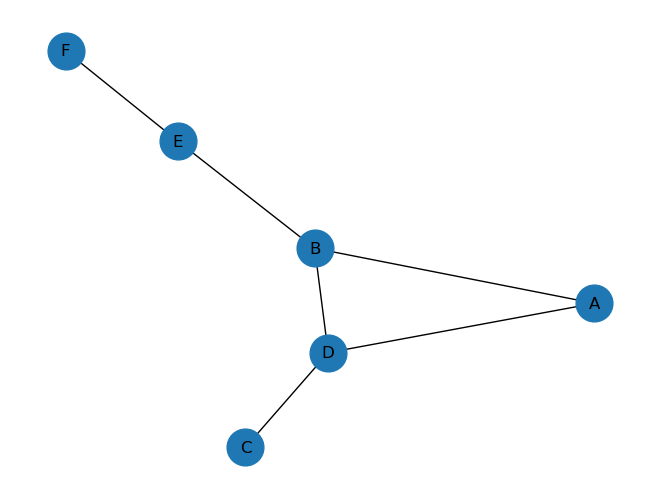

In [10]:
nx.draw(G_nx , pos=nx.spring_layout(G_nx), with_labels = True, node_size = 700)

### Busca em profundidade

In [11]:
list(nx.dfs_edges(G_nx, 'A'))

[('A', 'B'), ('B', 'D'), ('D', 'C'), ('B', 'E'), ('E', 'F')]

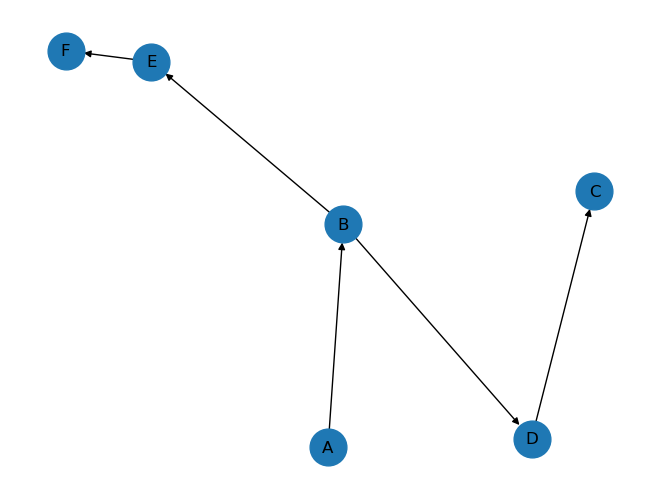

In [12]:
nx.draw(nx.dfs_tree(G_nx, 'A'), with_labels = True, node_size = 700)

### Busca em largura

In [13]:
list(nx.bfs_edges(G_nx, 'A'))

[('A', 'D'), ('A', 'B'), ('D', 'C'), ('B', 'E'), ('E', 'F')]

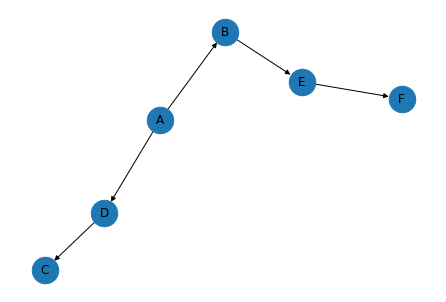

In [14]:
nx.draw(nx.bfs_tree(G_nx, 'A'), with_labels = True, node_size = 700)